# Load files

In [ ]:
import pandas as pd
import numpy as np
from algorithms import load_data
data_diam = load_data('data.csv','mood')
print(data_diam[['mood', 'water']][0:2])

# Ordinal logistic regression - playground

test logistic regression on derived modd and basic amount sleep phiscal activity and water

The method determines which solver from scipy.optimize is used, and it can be chosen from among the following strings:

*    ‘newton’ for Newton-Raphson, ‘nm’ for Nelder-Mead

*    ‘bfgs’ for Broyden-Fletcher-Goldfarb-Shanno (BFGS)

*   ‘lbfgs’ for limited-memory BFGS with optional box constraints

*    ‘powell’ for modified Powell’s method

*    ‘cg’ for conjugate gradient

*   ‘ncg’ for Newton-conjugate gradient

*   ‘basinhopping’ for global basin-hopping solver

*   ‘minimize’ for generic wrapper of scipy minimize (BFGS by default)


In [ ]:
from statsmodels.miscmodels.ordinal_model import OrderedModel
import numpy as np
np.seterr(divide='ignore', invalid='ignore')

derived = 'mood'
lbasics = ['amount of sleep',  'physical activity', 'water']
from algorithms import generateOLR
res_log = generateOLR(data_diam, derived, lbasics)
print(res_log.summary())

# check t value to p value

In [ ]:
from algorithms import ttest 
res = ttest(res_log, data_diam, 'mood', ['amount of sleep',  'physical activity', 'water'])
print(f'res/pvalue: {res}')

# pred

In [ ]:
pred_row = np.array(
    [[0.1, 0.2, 0.2, 0.1 , 0.4],
    [0.4, 0.4, 0.1, 0.04, 0.06],
    ]
)
print(pred_row)
print(pred_row.shape)
max_val = pred_row[:].max(1).reshape((-1,1))
# print(max_val)
(pred_i , pred_j) = np.where(pred_row == max_val) # get list indexe
pred = list(map(lambda x: pred_j[x], set(pred_i)))
print(pred)

index_vec = np.array([1,2,3,4,5])
pred = [np.sum(np.multiply(index_vec,pred_row[i][:])).round() for i in range(pred_row.shape[0])]
print(pred)

# Stepwise

In [ ]:
import numpy as np
from algorithms import generateOLR
from algorithms import ttest
from copy import copy

import warnings
warnings.filterwarnings("ignore") # ignore warning

#print(data_diam)

data = data_diam
in_threshold = 0.3
out_threshold = 0.2
sderived = 'mood'
lbasics = list(data.columns.values)
lbasics.remove(sderived)
from algorithms import stepwise_regression
(fit_model, param_in_model, cur_pvalue) = stepwise_regression(data, sderived, lbasics, in_threshold, out_threshold)
print(fit_model.summary())
print(f'param_in_model: {param_in_model}')


# Acurcay and distance vector

In [ ]:
import pandas as pd
import numpy as np

from evaluation import distance_vec
data = data_diam
sderived = 'mood'
lbasics = param_in_model
distance = distance_vec(data, sderived, lbasics, fit_model)


distance['dist'][2] = 2
print(distance)
from evaluation import accuracy
print(f'accuracy: {accuracy(distance)}')

# Filters

In [ ]:
from data_manipulation import avg_filter, filter
import numpy as np

data = [ 1,2,3,4,5,6]
for i in range(3,5):
    print(data[1:i])
filter_size = 2
func = avg_filter(filter_size)
res = filter(data, func, filter_size)
print(res)

In [ ]:
from data_manipulation import avg_filter, filter
import numpy as np
# filter before
import pandas as pd


data = [ 1,2,3,4,5,6]
for i in range(3,5):
    print(data[1:i])
filter_size = 2
func = avg_filter(filter_size)
data_diam = pd.read_csv("data.csv", dtype=np.double)
print(data_diam)
lparams = list(data_diam.columns.values)

size_sample = data_diam.shape[0]



data = np.empty((size_sample-filter_size+1, len(lparams)), dtype=np.double)
for i, param in enumerate(lparams):
    data[:,i] = filter(data_diam[param].values, func,filter_size)

print(data)

#df = pd.DataFrame(data, columns=lparams)
#print(df)

lfilters = [ func ] * len(lparams)
from algorithms import load_data_with_fiters
sderived = "amount of sleep"
df = load_data_with_fiters("30days.csv", sderived, lfilters, filter_size)
print(df)


# Evaluation graph

    mood amount of sleep  physical activity  cognitive load  water  \
0    4.0               3                1.0             0.0    1.5   
1    4.0               4                0.0             0.0    1.5   
2    1.0               5                3.0             2.0    3.0   
3    0.0               5                0.0             3.0    4.0   
4    2.0               5               -2.0             0.0    4.0   
5    2.5               5                1.5             1.5    5.0   
6    2.5               2                0.0             3.0    4.0   
7    3.5               1               -3.5             3.0    2.5   
8    3.0               2               -0.5             3.0    4.0   
9    2.0               2               -1.0             1.5    5.0   
10   2.5               4                0.0             2.0    5.0   
11   2.5               5                0.5             0.5    3.5   
12   3.5               5                0.5             0.5    3.0   
13   4.0            

c:\Users\do2vl\anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
c:\Users\do2vl\anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


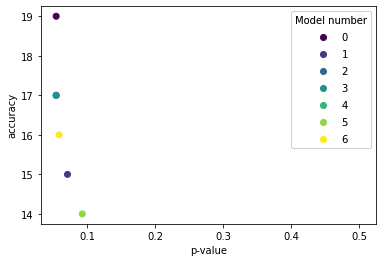

In [7]:
from data_manipulation import avg_filter, filter
import numpy as np
# filter before
import pandas as pd
from evaluation import distance_vec, accuracy
from algorithms import stepwise_regression

filter_size = 2
func = avg_filter(filter_size)
in_threshold = 0.3
out_threshold = 0.2
lfilters = [ func ] * 6


from algorithms import load_data_with_fiters
sderived = "amount of sleep"
df = load_data_with_fiters("30days.csv", sderived, lfilters, filter_size)
lbasics = list(df.columns.values)
lbasics.remove(sderived)


print(df.iloc[:15,:])

amount_of_days = 15
size_data = 25

x = []
y = []
for i in range(size_data-amount_of_days+1):
    cur_data = df.iloc[i:i+amount_of_days,:]
    if len(x) == 7:
        break
    try:
        (fit_model, param_in_model, cur_pvalue) = stepwise_regression(cur_data, sderived, lbasics)
    except:
        continue
    ac = accuracy(distance_vec(cur_data, sderived, param_in_model, fit_model))
    x.append(cur_pvalue)
    y.append(ac)


import numpy as np
import matplotlib.pyplot as plt


N = len(x)
c = range(N)

fig, ax = plt.subplots()

scatter = ax.scatter(x, y, c=c)
plt.xlabel("p-value")
plt.ylabel("accuracy")

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Model number")
ax.add_artist(legend1)

plt.show()



c:\Users\do2vl\anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
c:\Users\do2vl\anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


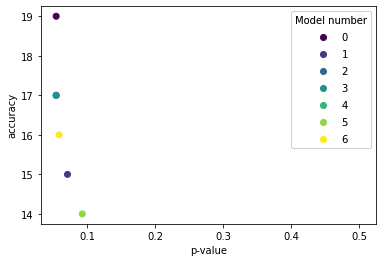

In [2]:
from data_manipulation import avg_filter, filter
import numpy as np
# filter before
import pandas as pd
from evaluation import distance_vec, accuracy, evaluation_graph
from algorithms import stepwise_regression

filter_size = 2
func = avg_filter(filter_size)
in_threshold = 0.3
out_threshold = 0.2
lfilters = [ func ] * 6


from algorithms import load_data_with_fiters
sderived = "amount of sleep"
df = load_data_with_fiters("30days.csv", sderived, lfilters, filter_size)
lbasics = list(df.columns.values)
lbasics.remove(sderived)

amount_of_days = 15

x, y = evaluation_graph(data, sderived, lbasics, amount_of_days, stepwise_regression )
import numpy as np
import matplotlib.pyplot as plt


N = len(x)
c = range(N)

fig, ax = plt.subplots()

scatter = ax.scatter(x, y, c=c)
plt.xlabel("p-value")
plt.ylabel("accuracy")

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                loc="upper right", title="Model number")
ax.add_artist(legend1)
plt.show()

# BestSubset

In [13]:
from data_manipulation import avg_filter, filter
import numpy as np
# filter before
import pandas as pd
from evaluation import distance_vec, accuracy, evaluation_graph
from algorithms import ttest, generateOLR


filter_size = 2
func = avg_filter(filter_size)
in_threshold = 0.3
out_threshold = 0.2
lfilters = [ func ] * 6


from algorithms import load_data_with_fiters
sderived = "amount of sleep"
df = load_data_with_fiters("30days.csv", sderived, lfilters, filter_size)
lbasics = list(df.columns.values)
lbasics.remove(sderived)

a = ['a']
b = a + ['b']
c = a + ['c']


def best_subset(data, sderived, lbasics, cur_params=[], index=0):
    if index == len(lbasics):
        if cur_params == []:
            return (None, None, 1)
        fit_model = generateOLR(data, sderived, cur_params)
        pvalue = ttest(fit_model, data, sderived, cur_params)
        return (fit_model, cur_params, pvalue)
    
    (fit_model_with_i, cur_params_with_i, pvalue_with_i) = best_subset(data, sderived, lbasics,cur_params+[lbasics[index]], index+1)
    (fit_model_without_i, cur_params_without_i, pvalue_without_i) = best_subset(data, sderived, lbasics,cur_params, index+1)
    if pvalue_with_i < pvalue_without_i:
        return (fit_model_with_i, cur_params_with_i, pvalue_with_i) 
    else:
        return (fit_model_without_i, cur_params_without_i, pvalue_without_i)


(fit_model_with_i, cur_params_with_i, pvalue_with_i) = best_subset(df, sderived, lbasics)
print(cur_params_with_i)
print(pvalue_with_i)
fit_model_with_i.summary()

['mood', 'physical activity', 'water']
0.010310876563463172


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:        amount of sleep   Log-Likelihood:                -31.877
Model:                   OrderedModel   AIC:                             77.75
Method:            Maximum Likelihood   BIC:                             87.33
Date:                Mon, 23 May 2022                                         
Time:                        17:28:41                                         
No. Observations:                  29                                         
Df Residuals:                      22                                         
Df Model:                           7                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
mood                 -0.6252      0.287     -2.179      0.029      -1.188      -0.063
physical activity     0.6538      0.239      2.730      0.006       0.184       1.123
water                -0.2318      0.355     -0.652      0.514      -0.928       0.465
1/2                  -5.6540      1.840     -3.072      0.002      -9.261      -2.047
2/3                   0.8397      0.485      1.733      0.083      -0.110       1.789
3/4                  -0.0280      0.469     -0.060      0.952      -0.947       0.891
4/5                  -0.0695      0.417     -0.166      0.868      -0.888       0.749
=====================================================================================
"""

# Spearman Corelation filtering

In [2]:
from scipy.stats import spearmanr
from data_manipulation import avg_filter, filter
import numpy as np
# filter before
import pandas as pd
from evaluation import distance_vec, accuracy, evaluation_graph
from algorithms import ttest, generateOLR


filter_size = 2
func = avg_filter(filter_size)
in_threshold = 0.3
out_threshold = 0.2
lfilters = [ func ] * 6


d = [('c',3),('b',2),('a',1)]
sd = d.sort(key = lambda x : x[1])
print(d)


from algorithms import load_data_with_fiters
sderived = "amount of sleep"
df = load_data_with_fiters("30days.csv", sderived, lfilters, filter_size)
lbasics = list(df.columns.values)
lbasics.remove(sderived)

(correlation, pvalue) = spearmanr(df[sderived], df[lbasics[0]])
print(pvalue)


pracentage_to_keep = 0.5
num_lparam = round(0.5 * len(lbasics))
print(num_lparam)

print(lbasics)
cor_basic = [(parm, spearmanr(df[sderived], df[parm])[1]) for parm in lbasics]

cor_basic.sort(key = lambda x: x[1])

print([param[0] for param in cor_basic[:num_lparam]])


[('a', 1), ('b', 2), ('c', 3)]
0.10058324913026247
2
['mood', 'physical activity', 'cognitive load', 'water', 'quality of sleep']
['physical activity', 'mood']


In [1]:
from scipy.stats import spearmanr
from data_manipulation import avg_filter, filter
import numpy as np
# filter before
import pandas as pd
from evaluation import distance_vec, accuracy, evaluation_graph
from algorithms import ttest,best_subset_with_spearman,filter_lbasic_with_spearman


filter_size = 2
func = avg_filter(filter_size)
in_threshold = 0.3
out_threshold = 0.2
lfilters = [ func ] * 6
from algorithms import load_data_with_fiters
sderived = "amount of sleep"
df = load_data_with_fiters("30days.csv", sderived, lfilters, filter_size)
lbasics = list(df.columns.values)
lbasics.remove(sderived)

spear_param = filter_lbasic_with_spearman(df, sderived, lbasics)
print(spear_param)
(fit_model_with_i, cur_params_with_i, pvalue_with_i) = best_subset_with_spearman(df, sderived, lbasics)
print(cur_params_with_i)
print(pvalue_with_i)
fit_model_with_i.summary()

['physical activity', 'mood']
['physical activity', 'mood']
0.019494740057652404


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:        amount of sleep   Log-Likelihood:                -32.092
Model:                   OrderedModel   AIC:                             76.18
Method:            Maximum Likelihood   BIC:                             84.39
Date:                Mon, 23 May 2022                                         
Time:                        18:39:56                                         
No. Observations:                  29                                         
Df Residuals:                      23                                         
Df Model:                           6                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
physical activity     0.6424      0.235      2.734      0.006       0.182       1.103
mood                 -0.6305      0.280     -2.251      0.024      -1.180      -0.081
1/2                  -4.9004      1.398     -3.506      0.000      -7.640      -2.161
2/3                   0.8332      0.492      1.694      0.090      -0.131       1.797
3/4                  -0.0542      0.469     -0.116      0.908      -0.972       0.864
4/5                  -0.0680      0.417     -0.163      0.871      -0.885       0.749
=====================================================================================
"""